# 18.06 Fall 2018 pset 1 
## (due Wednesday 2/14 at 10:55am by submitting pdf through [Stellar](https://stellar.mit.edu/S/course/18/sp18/18.06/) )

This problem set is in the form of a [Julia](http://julialang.org/) *notebook* (using the [Jupyter](http://jupyter.org/)/[IJulia](https://github.com/JuliaLang/IJulia.jl) browser-based interface to interactive programming).  We will be using the Julia language throughout the term for simple computational explorations — practical linear algebra is not about hand computations!

You can run this without installing anything by logging in at [JuliaBox](https://juliabox.com/).  Just download the notebook file (a `.ipynb` file) by clicking the download icon at the upper right, then drag it onto the JuliaBox dashboard to upload it there.

Some of the problems are pencil-and-paper (we just happen to use the notebook to describe them), and some of them require you to run the code in the notebook to see what happens and then explain it.  To **run the code** in an input cell, **just click on the cell and then type shift-return**; see also the "Help" menu in the notebook.  When you submit your pset, you may handwrite or type, but please look over and submit one clearly labeled pdf.  You may find
that the Jupyter Download-as-PDF or PrintPreview followed by the Browser Print button is cleaner.

## Problem 1

Which of these matrix functions  make sense (assume $m \ne n$)?
1. f(x) = W * x      (where W is an m x n matrix, x is a length n vector)
1. f(x) = W * x + b   (where W is an m x n matrix, x is a length n vector, b is a length n vector)
1. f(x) = W \* W * x (where W is an m x n matrix, x is a length n vector)
1. f(x) = W * x  + b (where W is an m x n matrix, x is a length n vector, b is a length m vector)
1. f(x) = x * W     (where W is an m x n matrix, x is a length n vector)
1. f(x) = sin.(W \* x) (where W is an m x n matrix, x is a length n vector and the "." means take the sine of element of the vector W*x)
1. f(x) = sin.(W) \* x  (where W is an m x n matrix, x is a length n vector)
1. f(x) = σ.(x) where (where σ is the [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function σ(t) = 1/(1+e^(-t)))

<br>
The "." is usually pronounced "dot" but if one thinks "point" one might remember it is a "pointwise" operation, i.e. applies seperately to every element.
<br><br><br><br><br><br><br>
Execute the commands in Julia to check your work.  While there will not be any computers on the exams, in the real world people check themselves all the time with a computer. (Shift + **enter** executes and moves to the next cell.)



In [ ]:
m = 2
n = 4
W = rand(m,n)
x = rand(n)
bm = rand(m)
bn = rand(n); # final semicolon suppresses printing of output

In [ ]:
W

Notice W is a 2x4 arrray whose elements are Float64 (they have decimals) and it is a "2" dimensional **matrix**.

In [ ]:
x

Notice x is a length 4 vector of Float64's and it is a "1" dimensional matrix. Humans often conflate a 4 vector with a 4x1 matrix.  Sometimes this is highly productive.  Julia usually makes the distinction between a 4 vector and a 4x1 matrix.

In [ ]:
W*x

In [ ]:
W*x + bn

In [ ]:
W*W*x

In [ ]:
W*x + bm

In [ ]:
x * W  

In [ ]:
sin.(W*x)

In [ ]:
sin.(W) * x

Packages are software libraries that one tends to add on an "as-needed" basis so not to take up too much room on your computer.

Very likely you will need the Flux package for σ to be defined.

On your own computer you should uncomment out the Pkg.add line once.  It will load Flux on your computer.
You will still need the using line for each session.

If you are using Juliabox, press the packages-->yours button on top of the first screen add flux as described
[here](http://docs.juliabox.com/#Installing-packages-1)

In [14]:
# Pkg.add("Flux")
using Flux   ### Let's load the Flux package which contains σ, 

In [ ]:
## if the above Using Flux command takes you more than 2 minutes
## forget about it and just uncomment out the line below
## to define the sigmoid

# σ(x) = 1/(1+e^(-x))

In [ ]:
σ.(W*x) # You can type \sigma+<tab> to get the greek letter sigma

σ goes from 0 to 1.  It is known as an activation function in machine learning.
You can get help by typing question mark and a function name

In [ ]:
? σ

## Problem 2 ( A little complexity)

Suppose W is nxn,  x is a vector of length n, b is a vector of length n.

1. What do you expect is the comparison between the time spent computing W*x when n is 10000 vs n is 20000?
1. What do you expect is the comparison between the time spent computing W*x+b when n is 10000 vs n is 20000?
1. What do you expect is the comparison between the time spent computing σ.(W*x+b) when n is 10000 vs n is 20000?
    
    <br><br><br><br><br><br><br>
    
    You can use the code in Julia below to verify or help with your answer.

In [ ]:
#add BenchmarkTools
using BenchmarkTools

In [ ]:
n1=10000
n2=20000
W1 = rand(n1,n1); x1=rand(n1); b1 = rand(n1)
W2 = rand(n2,n2); x2=rand(n2); b2 = rand(n2)
f1(x) = W1*x
f2(x) = W2*x
@benchmark f1(x1)

In [ ]:
@benchmark f2(x2)

In [ ]:
f3(x) = W1*x + b1
f4(x) = W2*x + b2
@benchmark f3(x1)

In [ ]:
@benchmark f4(x2)

In [ ]:
f3(x) = σ.(W1*x + b1)
f4(x) = σ.(W2*x + b2)

## Problem 3 Vectors


(a)  SUM OF VECTORS: What is the sum V of the twelve unit vectors that go from the center of a clock to the hours 1:00, 2:00, ..., 12:00?

<br><br><br><br><br><br>
<img src="http://2.bp.blogspot.com/-Y5mnXTd33z0/VDGXB-3qE3I/AAAAAAAASl0/mD1sb0gaLtU/s1600/clock-face-time4.jpg" size=10>
(b)  (SUBTRACTING VECTORS) In the sum of vectors above, if the 2:00 vector is removed, you can show that the remaining vectors add to 8:00. This is because subtracting a vector is the same as adding 
<span style="border-bottom: 1px solid black; padding-left: 200px">&nbsp;</span> ? <br>
Write your answer as a number from 1 through 4 below:<br>
1. An Opposite Vector
2. An Orthogonal Vector
3. A Parallel Vector
4. Zero

## Problem 4  Elimination sometimes breaks down
We would like you to use elimination to solve the following linear system of two equations:

$ax + 3y = −3$

$4x + 6y = 6$


For which number $a$ does elimination break down permanently? <br><br><br>

For which number $a$ does elimination break down temporarily?<br><br><br>

SOLVING THE NON-SINGULAR SYSTEM

Fix the temporary breakdown above by a row exchange and then solve.

Enter the value of $x$: <br>

Enter the value of  y:

## Problem 5  Plot Solutions of Linear Systems

 Consider the linear system for various values of p and q that you can manipulate


$x + y = p$

$-x + 3y = q$
    

Where is the solution when $p=7$ and $q=1$?  Draw the graph and give the solution. <br><br>

In [5]:
# Pkg.add PyPlot
# Pkg.add Interact
using PyPlot, Interact

Interact.Options{:SelectionSlider,Any}(1: "input" = 7.0 Any , "p", 7.0, "7.0", 15, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5,"3.0"=>3.0,"3.5"=>3.5,"4.0"=>4.0,"4.5"=>4.5…), Dict{Any,Any}(Pair{Any,Any}(5.5, "5.5"),Pair{Any,Any}(6.5, "6.5"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(10.5, "10.5"),Pair{Any,Any}(4.5, "4.5"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(7.0, "7.0"),Pair{Any,Any}(8.5, "8.5")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(3: "input-2" = 7.0 Any , "q", 7.0, "7.0", 15, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.5"=>0.5,"1.0"=>1.0,"1.5"=>1.5,"2.0"=>2.0,"2.5"=>2.5,"3.0"=>3.0,"3.5"=>3.5,"4.0"=>4.0,"4.5"=>4.5…), Dict{Any,Any}(Pair{Any,Any}(5.5, "5.5"),Pair{Any,Any}(6.5, "6.5"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(1.5, "1.5"),Pair{Any,Any}(10.5, "10.5"),Pair{Any,Any}(4.5, "4.5"),Pair{Any,Any}(11.0, "11.0"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(7.0, "7.0"),Pair{Any,Any}(8.5, "8.5")…)), Any[], Any[], true, "horizontal")

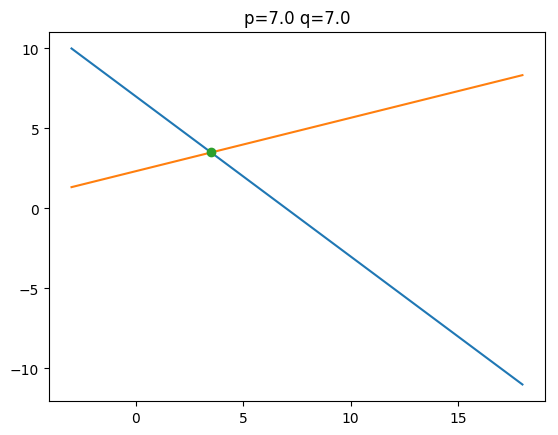

In [6]:
# Execute the code below
f=figure()
x=-3:7:20
@manipulate for p=0:.5:14,q=0:.5:14; withfig(f) do
        plot(x,p-x)
        plot(x,(q+x)/3)
        plot((3*p-q)/4,  (p+q)/4, "o")
        title("p=$p q=$q")
   end
end

## Problem 6  (GS problem 11 on p. 54)

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## Problem 7 (GS Problem 18 on p. 55)

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## Problem 8 (GS Problem 27 on p. 56)

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## Problem 9 (GS Problem 1 on p. 66)

<br><br><br><br><br><br><br><br><br><br><br><br><br>

## Problem 10: (GS Problem 35 on p. 45)